In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [4]:
train_df = pd.read_csv('train[1].csv')
test_df = pd.read_csv('test[1].csv')

train_df.dropna(subset=['quantity'], inplace=True)

train_df['date'] = pd.to_datetime(train_df['date'], format="%d/%m/%y")
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
# train_df['day_of_week_name'] = train_df['date'].dt.day_name()
train_df['day_of_week'] = train_df['date'].dt.dayofweek
# train_df['is_weekend_name'] = train_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6]).astype(int)

train_df = train_df.astype({'quantity': int, 'pop': int, 'id': int})
train_df.drop('id', axis=1, inplace=True)

train_df['city_num'] = train_df['city'].astype('category').cat.codes
train_df['shop_num'] = train_df['shop'].astype('category').cat.codes
train_df['brand_num'] = train_df['brand'].astype('category').cat.codes
train_df['container_num'] = train_df['container'].astype('category').cat.codes
train_df['capacity_num'] = train_df['capacity'].astype('category').cat.codes

train_df['lag_1'] = train_df['quantity'].shift(1)
train_df['lag_2'] = train_df['quantity'].shift(2)

train_df['rolling_mean_3'] = train_df['quantity'].rolling(window=3).mean()
train_df['rolling_var_3'] = train_df['quantity'].rolling(window=3).var()

train_df['diff_1'] = train_df['quantity'].diff()
train_df['seasonal_diff_12'] = train_df['quantity'].diff(12)
train_df['seasonal_diff_90'] = train_df['quantity'].diff(90)

train_df['rate_of_change'] = train_df['quantity'].diff() / train_df['quantity'].shift()
train_df['cumulative_sum'] = train_df['quantity'].cumsum()

train_df['ewm_mean'] = train_df['quantity'].ewm(span=12).mean()
train_df['ewm_std'] = train_df['quantity'].ewm(span=12).std()



test_df['date'] = pd.to_datetime(test_df['date'], format="%d/%m/%y")
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6]).astype(int)

test_df = test_df.astype({'quantity': int, 'pop': int, 'id': int})
test_df.drop('id', axis=1, inplace=True)

test_df['city_num'] = test_df['city'].astype('category').cat.codes
test_df['shop_num'] = test_df['shop'].astype('category').cat.codes
test_df['brand_num'] = test_df['brand'].astype('category').cat.codes
test_df['container_num'] = test_df['container'].astype('category').cat.codes
test_df['capacity_num'] = test_df['capacity'].astype('category').cat.codes

test_df['lag_1'] = test_df['quantity'].shift(1)
test_df['lag_2'] = test_df['quantity'].shift(2)

test_df['rolling_mean_3'] = test_df['quantity'].rolling(window=3).mean()
test_df['rolling_var_3'] = test_df['quantity'].rolling(window=3).var()

test_df['diff_1'] = test_df['quantity'].diff()
test_df['seasonal_diff_12'] = test_df['quantity'].diff(12)
test_df['seasonal_diff_90'] = test_df['quantity'].diff(90)

test_df['rate_of_change'] = test_df['quantity'].diff() / test_df['quantity'].shift()
test_df['cumulative_sum'] = test_df['quantity'].cumsum()

test_df['ewm_mean'] = test_df['quantity'].ewm(span=12).mean()
test_df['ewm_std'] = test_df['quantity'].ewm(span=12).std()

train_df.head(20)

,date,city,lat,long,pop,shop,brand,container,capacity,price,...,lag_2,rolling_mean_3,rolling_var_3,diff_1,seasonal_diff_12,seasonal_diff_90,rate_of_change,cumulative_sum,ewm_mean,ewm_std
0,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,glass,500ml,0.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13280,13280.000000,NaN
1,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,plastic,1.5lt,2.86,...,NaN,NaN,NaN,-6553.0,NaN,NaN,-0.493449,20007,9730.458333,4633.670737
2,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,can,330ml,0.87,...,13280.0,9951.666667,1.074351e+07,3121.0,NaN,NaN,0.463951,29855,9776.334873,3137.803186
3,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,glass,500ml,1.00,...,6727.0,12208.333333,4.855396e+07,10202.0,NaN,NaN,1.035946,49905,13019.329454,6062.800317
4,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,can,330ml,0.39,...,9848.0,18531.333333,6.451954e+07,5646.0,NaN,NaN,0.281596,75601,16463.535535,8090.559229
5,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,orange-power,glass,500ml,1.00,...,20050.0,20262.333333,2.841607e+07,-10655.0,NaN,NaN,-0.414656,90642,16117.784561,6937.339855
6,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,orange-power,can,330ml,0.43,...,25696.0,25105.000000,9.568555e+07,19537.0,NaN,NaN,1.298916,125220,20237.117049,10325.871045
7,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,gazoza,glass,500ml,0.49,...,15041.0,31451.000000,2.277522e+08,10156.0,NaN,NaN,0.293713,169954,25349.238948,14086.476516
8,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,lemon-boost,glass,500ml,0.70,...,34578.0,32645.000000,1.732484e+08,-26111.0,NaN,NaN,-0.583695,188577,24018.549477,12856.197603
9,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,lemon-boost,plastic,1.5lt,2.21,...,44734.0,24334.000000,3.322711e+08,-8978.0,NaN,NaN,-0.482092,198222,21294.767437,12989.304678


In [5]:
X_train_simple = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
X_train = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                    'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_train = train_df['quantity']

X_test_simple = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
X_test = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                  'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test = test_df['quantity']

In [ ]:
pip install catboost

In [8]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error, mean_poisson_deviance, mean_gamma_deviance
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [9]:
X_train_simple

,city_num,pop,shop_num,brand_num,container_num,capacity_num,price,year,month
0,0,672130,0,2,1,2,0.96,2012,1
1,0,672130,0,2,2,0,2.86,2012,1
2,0,672130,0,2,0,1,0.87,2012,1
3,0,672130,0,0,1,2,1.00,2012,1
4,0,672130,0,0,0,1,0.39,2012,1
...,...,...,...,...,...,...,...,...,...
6475,0,665871,2,4,2,0,1.02,2017,12
6476,2,144302,4,4,0,1,0.47,2017,12
6477,3,168501,5,0,1,2,1.02,2017,12
6478,4,353001,3,1,2,0,1.34,2017,12


In [18]:
class NestedCV:
    def __init__(self, k):
        self.k = k



    def custom_nested_cross_validation(self,model, X, y):
        """
        Custom nested cross-validation function using a walking window approach.

        Parameters:
        - model: The machine learning model to be evaluated.
        - X: The feature matrix.
        - y: The target variable.
        - train_size: The proportion of the dataset to include in the training set.
        - test_size: The size of the testing set.
        - scoring: The scoring metric to be used.

        Returns:
        - results: Array of scores for each iteration.
        """
        test_size=0.1
        n = len(X)
        train_start = 0
        train_end = int((n * 0.9)/self.k)
        test_start = train_end
        test_end = min(n, int(test_start + test_size*n))
        scores = []

        scoring='r2'

        while train_end <= n-n*test_size:  # Adjusted condition to prevent empty testing set
            X_train = X.iloc[train_start:train_end]
            y_train = y[train_start:train_end]
            X_test = X.iloc[test_start:test_end]
            y_test = y[test_start:test_end]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            score = r2_score(y_test, y_pred)



            scores.append(score)

            # Move the window
            #train_start += 1
            train_end += int((n * 0.9)/self.k)
            test_start =train_end
            test_end = min(n, int(test_start + test_size*n))

        return np.array(scores).mean()


Linear Regression


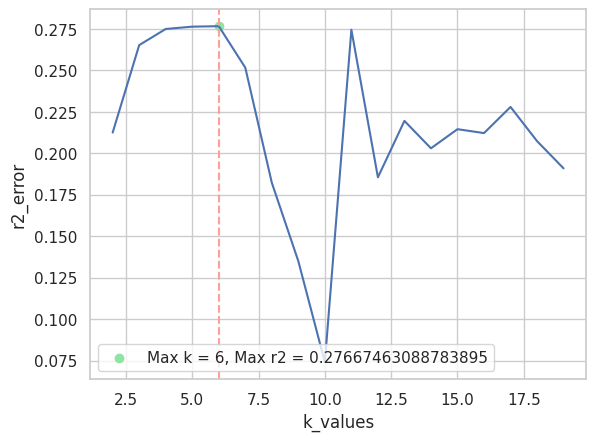

Ridge Regression


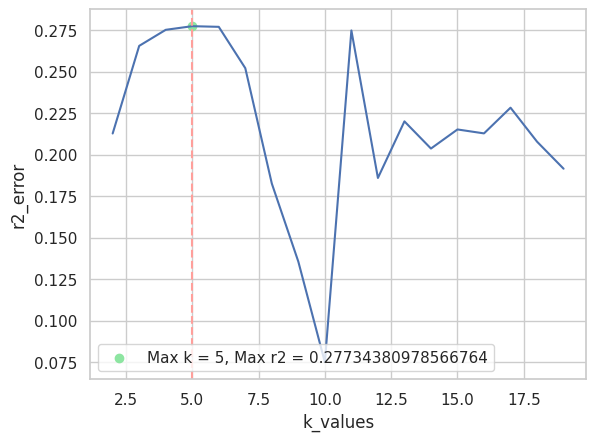

Lasso Regression


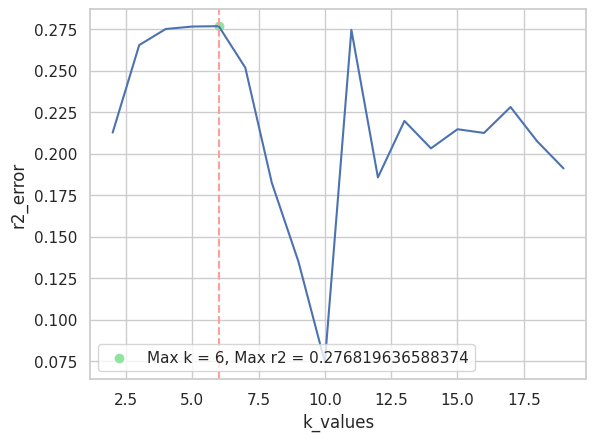

Elastic-Net Regression


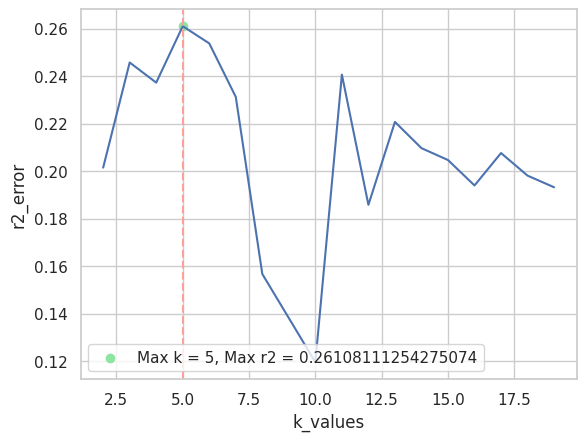

Decision Tree


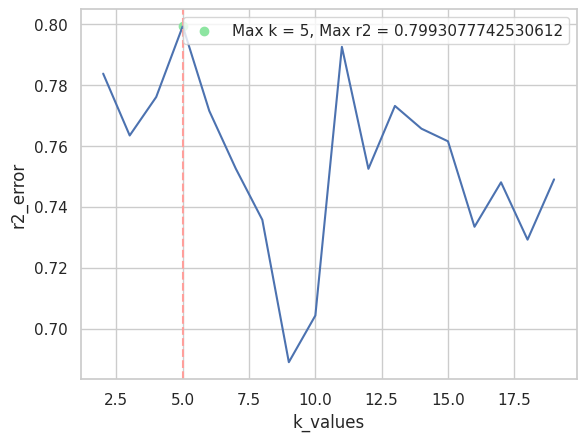

Random Forest


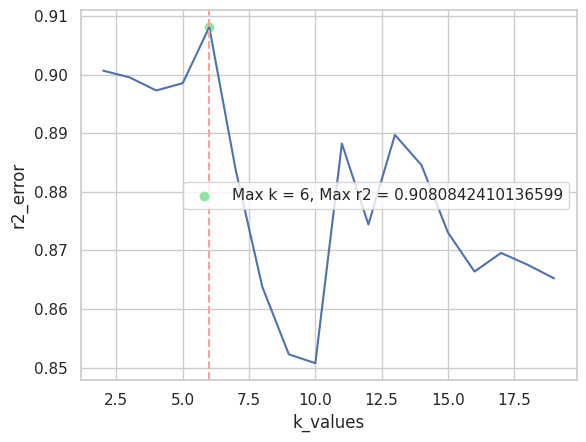

Extra Trees


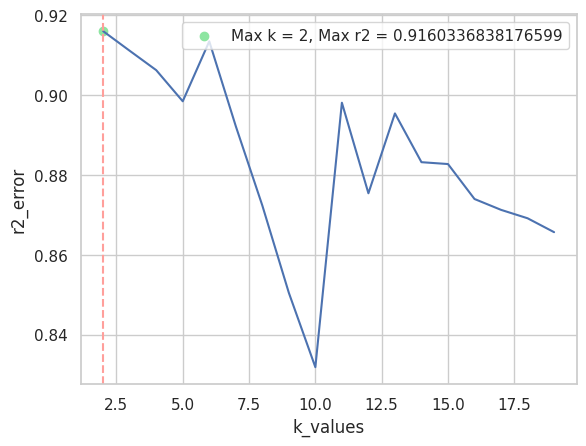

Gradient Boosting


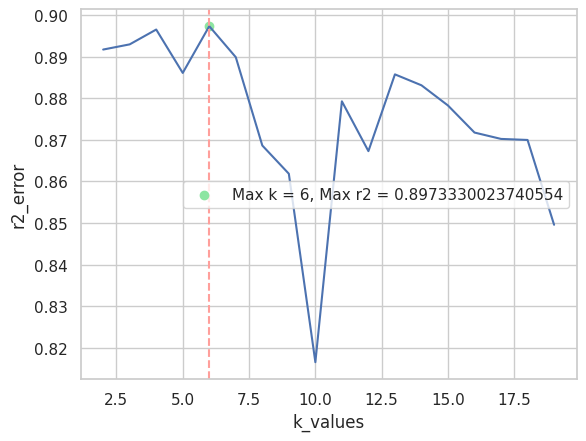

Ada Boost


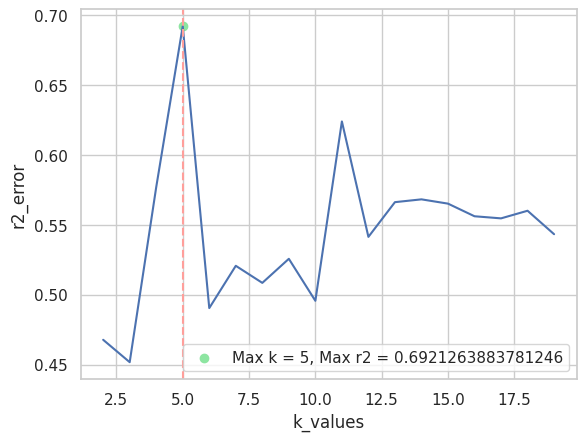

XGBRegressor


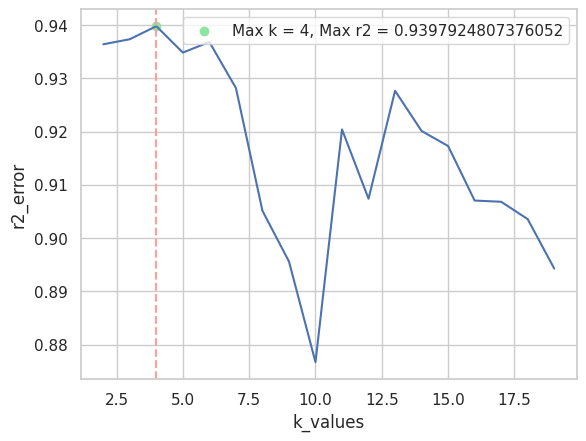

LGBMRegressor


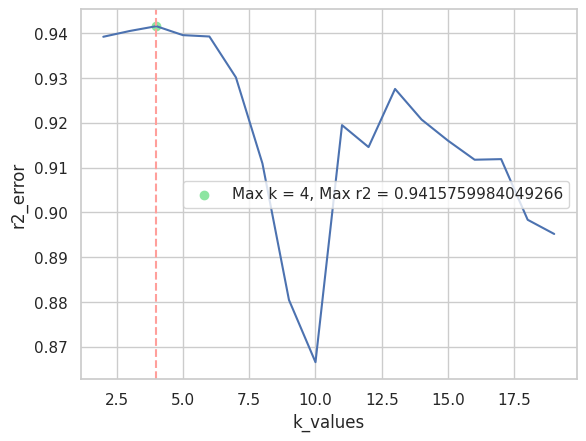

CatBoostRegressor


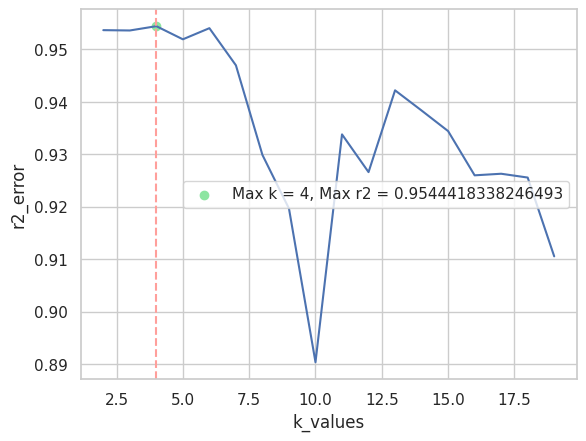

KNeighbors


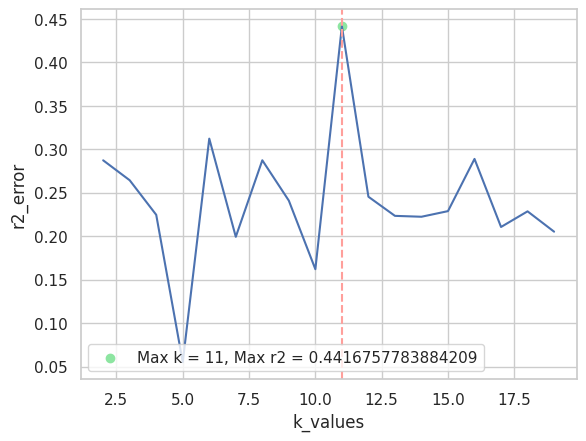

In [24]:
models=[("Linear Regression", LinearRegression()),
        ("Ridge Regression", Ridge()),
        ("Lasso Regression", Lasso()),
        ("Elastic-Net Regression", ElasticNet()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("Extra Trees", ExtraTreesRegressor()),
        ("Gradient Boosting", GradientBoostingRegressor()),
        ("Ada Boost", AdaBoostRegressor()),
        ("XGBRegressor", XGBRegressor()),
        ("LGBMRegressor", LGBMRegressor(verbose=-1)),
        ("CatBoostRegressor", CatBoostRegressor(silent=True)),
        ("KNeighbors", KNeighborsRegressor())]


for name, model in models:
    x=[]
    y=[]
    for k in range(2,20):
        obj = NestedCV(k)


        results = obj.custom_nested_cross_validation(model, X_train_simple, y_train)

        x.append(k)
        y.append(results.mean())

    print(name)
    x=np.array(x)
    y=np.array(y)
    mx=-10
    x_index=0
    for i in range(len(x)):
        if y[i]>mx:
            mx=y[i]
            x_index=x[i]


    plt.plot(x,y)


    x_vertical = x_index

# Draw the vertical line
    plt.axvline(x=x_vertical, color='r', linestyle='--')

    # Add labels and title
    plt.xlabel('k_values')
    plt.ylabel('r2_error')

    plt.scatter(x_index, mx, color='g', label=f'Max k = {x_index}, Max r2 = {mx}')
    plt.legend()



    plt.show()